In [1]:
import numpy as np
import qutip as qt

import pulsee.plot as psplt

import operators as op
# from global_constants import CLEAN_1000, RHO_1000

pi = np.pi
identity = qt.tensor(op.id, op.id)

ModuleNotFoundError: No module named 'pulsee'

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


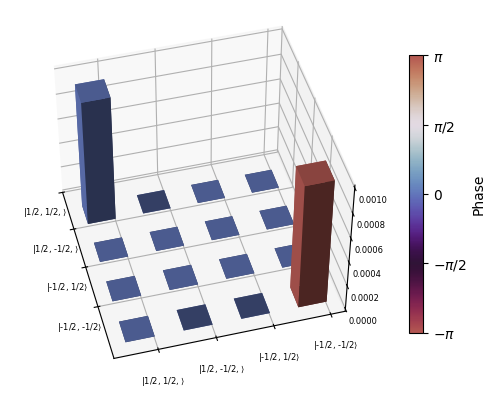

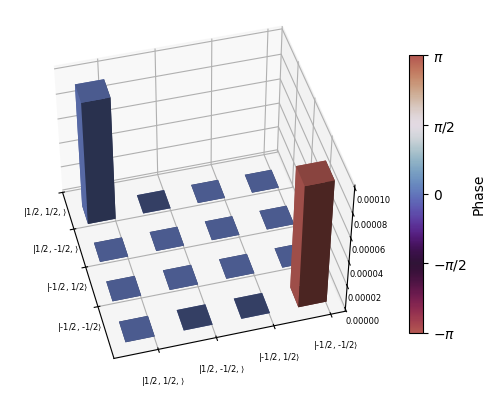

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [2]:
Thermal=(.001)*(op.Iz+op.Sz)
psplt.plot_complex_density_matrix(Thermal)



Thermal=(.0001)*(op.Iz+op.Sz)
psplt.plot_complex_density_matrix(Thermal)


# H Gate

In [3]:
op.Rx(pi)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]

$$
R_y(\pi/2) = \frac{1}{\sqrt{2}} 
    \begin{pmatrix}
        1 & -1\\
        1 & 1
    \end{pmatrix}
$$

In [4]:
op.Ry(pi/2) * np.sqrt(2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1. -1.]
 [ 1.  1.]]

In [5]:
op.Rx(pi) * op.Ry(pi/2) / (-1j/np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

In [6]:
H = op.Rx(pi) * op.Ry(pi/2)
H

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.-0.70710678j 0.-0.70710678j]
 [0.-0.70710678j 0.+0.70710678j]]

In [7]:
#op.H_1  / (-1j/np.sqrt(2))

# T gate:

In [8]:
op.Rx(pi/2) / (1/np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.-1.j]
 [0.-1.j 1.+0.j]]

In [9]:
np.sqrt(2)

1.4142135623730951

In [10]:
op.Ry(pi/4)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]

In [11]:
op.Ry(pi)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0. -1.]
 [ 1.  0.]]

In [12]:
# op.Ry(pi/4) / np.cos(pi/8)
op.Ry(pi/4)**4

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -2.77555756e-16]]

In [13]:
op.Rx(-pi/2) / (1/np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.+1.j]
 [0.+1.j 1.+0.j]]

In [14]:
T = op.Rx(pi/2) * op.Ry(pi/4) * op.Rx(-pi/2) 
T

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 9.23879533e-01-3.82683432e-01j -8.32667268e-17+1.11022302e-16j]
 [ 1.11022302e-16-5.55111512e-17j  9.23879533e-01+3.82683432e-01j]]

In [15]:
# T_new = T / T.full()[0,0]
T_new = T * np.exp(1j*pi/8)
T_new

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00-5.55111512e-17j -1.19414820e-16+7.07064361e-17j]
 [ 1.23814431e-16-8.79922067e-18j  7.07106781e-01+7.07106781e-01j]]

In [16]:
np.exp(1j*pi/4)

(0.7071067811865476+0.7071067811865476j)

# Temporal Averaging:
Donny has used these pulse sequences: (read from left to right)
- U0 = no pulses
- U1 = Sy - 1/2J - Iy - Sx - 1/2J - Ix 
- U2 = Iy - 1/2J - Ix - Sy - 1/2J - Sx

In [17]:
rho_therm = qt.Qobj(
    np.array([[1,0,0,0], [0,2,0,0], [0,0,3,0], [0,0,0,4]]),
    dims=[[2,2], [2,2]]).unit()

rho_therm

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.4]]

In [18]:
ta_0 = identity
display(ta_0)
rho_0 = ta_0 * rho_therm * ta_0.dag()
rho_0

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.4]]

In [19]:
ta_1 = op.Rx_I(pi/2) * op.UJ * op.Rx_S(pi/2) * op.Ry_I(pi/2) * op.UJ * op.Ry_S(pi/2)
display(ta_1)

rho_1 = ta_1 * rho_therm * ta_1.dag()
rho_1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00-1.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+2.77555756e-17j  0.00000000e+00+2.49800181e-16j
  -1.00000000e+00+0.00000000e+00j -2.22044605e-16+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+2.22044605e-16j  0.00000000e+00-1.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00-2.49800181e-16j  0.00000000e+00-2.77555756e-17j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e-01 -2.77555756e-18  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-18  3.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.00000000e-01  1.11022302e-17]
 [ 0.00000000e+00  0.00000000e+00  1.11022302e-17  2.00000000e-01]]

In [20]:
ta_2 = op.Rx_S(pi/2) * op.UJ * op.Ry_S(pi/2) * op.Rx_I(pi/2) * op.UJ * op.Ry_I(pi/2)
display(ta_2)

rho_2 = ta_2 * rho_therm * ta_2.dag()
rho_2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00-1.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+2.22044605e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
   0.00000000e+00+2.35513869e-16j -2.22044605e-16+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-2.35513869e-16j
   1.00000000e+00+0.00000000e+00j  0.00000000e+00-7.39557099e-32j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.00000000e-01 0.00000000e+00 1.91233672e-32]
 [0.00000000e+00 0.00000000e+00 2.00000000e-01 0.00000000e+00]
 [0.00000000e+00 1.91233672e-32 0.00000000e+00 3.00000000e-01]]

In [21]:
1/3 * (rho_0 + rho_1 + rho_2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e-01 -9.25185854e-19  0.00000000e+00  0.00000000e+00]
 [-9.25185854e-19  3.00000000e-01  0.00000000e+00  6.37445572e-33]
 [ 0.00000000e+00  0.00000000e+00  3.00000000e-01  3.70074342e-18]
 [ 0.00000000e+00  6.37445572e-33  3.70074342e-18  3.00000000e-01]]

In [22]:
(1/4 * (1-0.1) * identity + 0.1 * op.CLEAN_1000) * 1/3

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.10833333 0.         0.         0.        ]
 [0.         0.075      0.         0.        ]
 [0.         0.         0.075      0.        ]
 [0.         0.         0.         0.075     ]]

# CNOT gate we have used in our experiments so far.

Technically, it's a pseudo-cnot, where the non-zero shape of the matrix is correct, but the phase of each element is wrong:


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00-7.85046229e-17j  1.11022302e-16-6.16297582e-33j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-1.23259516e-32+0.00000000e+00j  7.85046229e-17+1.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.23259516e-32+1.66533454e-16j -7.85046229e-17-1.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.00000000e+00-7.85046229e-17j  2.22044605e-16-6.16297582e-33j]]

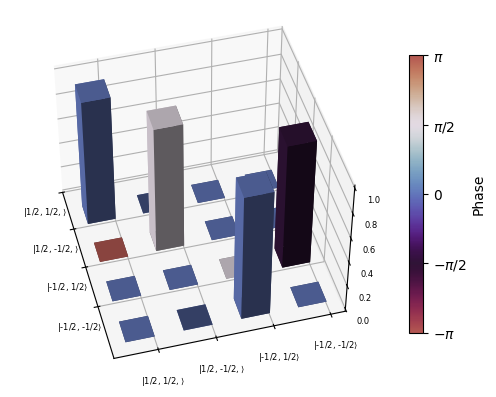

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [23]:
cnot_pseudo = np.sqrt(1j) * op.Rx_S(pi / 2) * op.UJ * op.Ry_S(pi / 2)
display(cnot_pseudo)
psplt.plot_complex_density_matrix(cnot_pseudo)

Correctly phased CNOT gate:

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.66533454e-16  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.22044605e-16]]

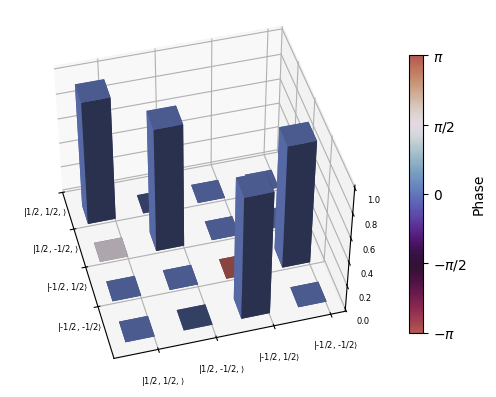

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [24]:
cnot_correct = op.Rz_I(pi/2) * op.Rz_S(-pi/2) * cnot_pseudo
display(cnot_correct)
psplt.plot_complex_density_matrix(cnot_correct)

## CNOT_pseudo vs CNOT_correct

So far, we didn't measure any difference between the CNOT_pseudo and CNOT_correct, so I incorrectly assumed that the individual element phases cancelled out.

However, this isn't the case. We only didn't notice that CNOT_pseudo isn't the complete CNOT because our input and output states only have diagonal elements (spins are along the z-axis).

If we have inputs & outputs with non-diagonal elements (spins away z-axis), we should notice the difference:

First, our usual diagonal input:

In [25]:
display(cnot_pseudo * op.CLEAN_1000 * cnot_pseudo.dag())
display(cnot_correct * op.CLEAN_1000 * cnot_correct.dag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99999997e-01 -1.23259516e-32  0.00000000e+00  0.00000000e+00]
 [-1.23259516e-32  1.51929083e-64  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99999997e-01 1.11022302e-16 0.00000000e+00 0.00000000e+00]
 [9.67644183e-49 7.59645417e-65 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

Now, non-diagonal input:

In [26]:
full_state = qt.Qobj(np.array([[1, 1, 1, 1],
                             [1, 1, 1, 1],
                             [1, 1, 1, 1],
                             [1, 1, 1, 1]], dtype=complex), dims=[[2,2],[2,2]])

In [27]:
# non_diag_state = op.Ry_I(pi/2) * CLEAN_1000 * op.Ry_I(pi/2)
# non_diag_state = op.Ry_S(pi/7) * CLEAN_1000 * op.Ry_S(pi/7)
non_diag_state = full_state
non_diag_state

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

In [28]:
display(cnot_pseudo * non_diag_state * cnot_pseudo.dag())
display(cnot_correct * non_diag_state * cnot_correct.dag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00-1.23259516e-32j -1.23259516e-32-1.00000000e+00j
   0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j
  -1.00000000e+00-1.23259516e-32j -1.23259516e-32+1.00000000e+00j]
 [ 0.00000000e+00-1.00000000e+00j -1.00000000e+00+0.00000000e+00j
   1.00000000e+00+1.23259516e-32j  1.23259516e-32-1.00000000e+00j]
 [ 1.00000000e+00-1.23259516e-32j -1.23259516e-32-1.00000000e+00j
   0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

In [29]:
op.Rz_I(pi) * op.Ry_I(-pi/2) * np.sqrt(2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.-1.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+1.j]]

In [30]:
op.Rz(pi) * op.Ry(-pi/2) * np.sqrt(2) * 1j

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

In [31]:
op.Rx(pi) * op.Ry(pi/2) * np.sqrt(2) * 1j

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]